In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Normalizer

In [2]:
df = pd.read_csv("boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [58]:
features = [
    'CRIM', #per capita crime rate by town
    #'ZN',   #proportion of residential land zoned for lots over 25,000 sq.ft.
    'INDUS',#proportion of non-retail business acres per town
    #'CHAS', #Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    'NOX',  #nitric oxides concentration (parts per 10 million)
    #'RM',   #average number of rooms per dwelling
    'AGE',  #proportion of owner-occupied units built prior to 1940
    'DIS',  #weighted distances to five Boston employment centres
    'RAD',  #index of accessibility to radial highways
    'TAX',  #full-value property-tax rate per $10,000
    #'PTRATIO', #pupil-teacher ratio by town
    #'B',    #1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    'LSTAT' #% lower status of the population
]

In [59]:
corr = df[features].corr()

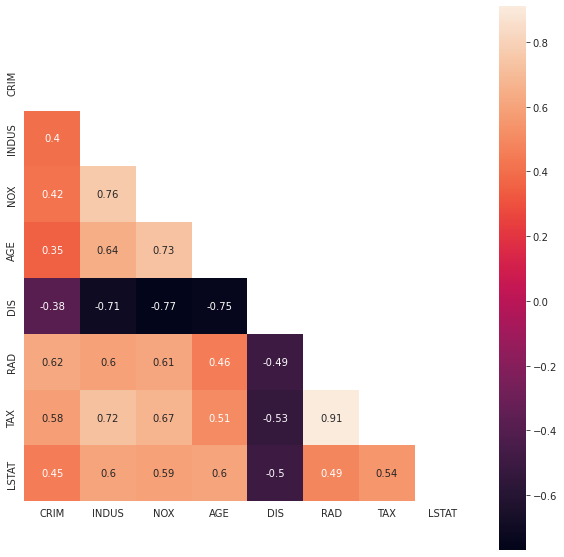

In [60]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(10, 10));
    
    sns.heatmap(
        corr,
        ax=ax,
        annot=True,
        mask=mask,
        square=True
    );

In [66]:
df = df.drop(columns=["ZN","CHAS","RM","PTRATIO","B"])
df.head()

,CRIM,INDUS,NOX,AGE,DIS,RAD,TAX,LSTAT,MDEV
0,0.00632,2.31,0.538,65.2,4.0900,1.0,296.0,4.98,24.0
1,0.02731,7.07,0.469,78.9,4.9671,2.0,242.0,9.14,21.6
2,0.02729,7.07,0.469,61.1,4.9671,2.0,242.0,4.03,34.7
3,0.03237,2.18,0.458,45.8,6.0622,3.0,222.0,2.94,33.4
4,0.06905,2.18,0.458,54.2,6.0622,3.0,222.0,5.33,36.2


In [68]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=["MDEV"]), df["MDEV"],test_size=0.25,shuffle=True)


In [70]:
models = {
    'RandomForestRegressor': RandomForestRegressor(),
    'LinearRegression': LinearRegression(),
    'MLPRegressor': MLPRegressor(max_iter=2000),
    'SVR': SVR()
}

In [71]:
for i in models:
    model = models[i]
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    print(f'{i} MAE: {mean_absolute_error(y_test,y_predict)}')

RandomForestRegressor MAE: 3.2790787401574812
LinearRegression MAE: 4.899047621578735
MLPRegressor MAE: 4.40431179420328
SVR MAE: 6.4561350520411045


In [72]:
params = {
    'LinearRegression': {},
    'SVR': {'kernel': ['linear', 'poly', 'rbf', 'sigmoid' ]},
    'MLPRegressor': {'hidden_layer_sizes': [(100,),(50,50),(100,50),(500, 300),(250, 800)]},
    'RandomForestRegressor': {'n_estimators':[50,100,150,200]}
}

In [73]:
best_mae = 10
for i in models:
    model = GridSearchCV(models[i], params[i])
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_predict)
    if mae < best_mae:
        best_model = model
        best_mae = mae
    print(f'{i} {model.best_params_} {mae}')

RandomForestRegressor {'n_estimators': 200} 3.2550826771653547
LinearRegression {} 4.899047621578735
MLPRegressor {'hidden_layer_sizes': (100,)} 4.649025295642089
SVR {'kernel': 'linear'} 4.967819131588932


In [81]:
model = best_model.best_estimator_
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
mean_absolute_error(y_test, y_predict)

3.2037716535433063

In [76]:
normalizer = Normalizer().fit(x_train)
X_train_normalized = normalizer.transform(x_train)
X_test_normalized = normalizer.transform(x_test)

In [82]:
model = best_model.best_estimator_
model.fit(X_train_normalized, y_train)
y_predict = model.predict(X_test_normalized)
mean_absolute_error(y_test, y_predict)

3.3468543307086627

In [79]:
standard = Normalizer().fit(x_train)
X_train_standardized = standard.transform(x_train)
X_test_standardized = standard.transform(x_test)

In [84]:
model = best_model.best_estimator_
model.fit(X_train_standardized, y_train)
y_predict = model.predict(X_test_standardized)
mean_absolute_error(y_test, y_predict)

3.3173740157480314